<h1 align="center"> Computación Cientifica - Laboratorio 4: Resolución de ecuaciones diferenciales parciales </h1>
<br>
<br>
** Autores **:
+ Yerson Escobar - 201273084-8 
+ Eduardo Ramírez - 201103031-1


## Introducción

## Desarrollo

### Ley de Ampere

1.- Como nos piden la ecuación característica de onda en el vacío, podemos eliminar la densidad de corriente de la Ley de Ampere, ya que esta es 0, por lo que debemos obtener la ecuación de onda de: 

$$ \begin{equation}
    \vec{\nabla} \times \vec{B} = \mu_0 \epsilon_0 \frac{\partial \vec{E}}{\partial t}
\end{equation}
$$

Ahora, desarrollando un poco la ecuación: 

$$ \begin{align}
    \vec{\nabla} \times \vec{B} &= \mu_0 \epsilon_0 \frac{\partial \vec{E}}{\partial t} \qquad \qquad \qquad / \vec{\nabla} \times () \\
    \vec{\nabla} \times (\vec{\nabla} \times \vec{B}) &= \vec{\nabla} \times \left( \mu_0 \epsilon_0 \frac{\partial \vec{E}}{\partial t} \right) \qquad / \text{Usando el Hint 2} \\
    \vec{\nabla}(\vec{\nabla} \cdot \vec{B}) - \vec{\nabla}^2 \vec{B} &= \mu_0 \epsilon_0 \left [ \vec{\nabla} \times \left( \frac{\partial \vec{E}}{\partial t} \right) \right] \quad / \text{Usando el Hint 1} \implies \vec{\nabla} \cdot \vec{B} = 0\\
    - \vec{\nabla}^2 \vec{B} &= \mu_0 \epsilon_0 \frac{\partial}{\partial t} \left( \vec{\nabla} \times \vec{E} \right)
\end{align}
$$

Por ley de Faraday, tenemos que $ \vec{\nabla} \times \vec{E} = - \frac{\partial \vec{B}}{ \partial t} $ (ver referencia 1). Usando esto podemos reemplazar y dejar la ecuación de la siguiente forma: 

$$ \begin{align}
    - \vec{\nabla}^2 \vec{B} &= \mu_0 \epsilon_0 \frac{\partial}{\partial t} \left( - \frac{\partial \vec{B}}{\partial t} \right) \\
    \implies - \vec{\nabla}^2 \vec{B} &= - \mu_0 \epsilon_0 \frac{\partial^2 \vec{B}}{\partial t^2} \\
    \implies \vec{\nabla}^2 \vec{B} &= \mu_0 \epsilon_0 \vec{B}_{tt}
\end{align}
$$

Lo cual es la ecuación de onda característica. Para nuestro caso, $ \vec{B} = \vec{B}(x,y) $, por lo que la ecuación queda de la siguiente forma:

$$ \begin{equation}
    \vec{B}_{xx} + \vec{B}_{yy} = \mu_0 \epsilon_0 \vec{B}_{tt}
\end{equation}
$$

<br>
2.- $ \mu_0 $ es la *permeabilidad magnética del vacío*, la cuál es una constante que  representa la capacidad del vacío de atraer y hacer pasar a través de sí campos magnéticos y tiene un valor igual a $ 4 \pi \times 10^{-7} \left[\frac{H}{m}\right] $ (ver referencia 2). Por otro lado, la constante $ \epsilon_0 $ representa la *permitividad del vacío*, y define como un campo eléctrico afecta y es afectado por el vacío; este tiene un valor igual a $ 8,854 \times 10^{-12} \left[\frac{F}{m}\right] $ (ver referencia 3). Ambos juntos representan $ \frac{1}{c^2} $, con $ c $ siendo la velocidad de la luz (igual a $ 3 \times 10^8 \left[\frac{m}{s}\right] $ (Ver referencia 4).

<br>

3.- Sea el dominio de discretización en $ \left[ a, b \right] \times \left[ c,d \right] $ en el tiempo $ \left[ 0, T_{max} \right] $. Discretizaremos este dominio en $ N_x, N_y, N_t $ puntos tal que $ \Delta x = \frac{b - a}{N_x}, \Delta y = \frac{c - d}{N_y}, \Delta t = \frac{T_{max}}{N_t} $, esto quiere decir que tendremos $ x_i = x_0 + i\Delta x, \forall i \in \left\lbrace 0, 1, \ldots, N_x \right\rbrace $; $ y_j = y_0 + j\Delta y, \forall j \in \left\lbrace 0, 1, \ldots, N_y \right\rbrace $ y $ t_k = k\Delta t, \forall k \in \left\lbrace 0, 1, \ldots, N_t \right\rbrace $. La discretización de la ecuación de onda será $ u(x,y,t) \sim w_{i,j,k} $.\\
Para las segundas derivadas utilizaremos las siguientes aproximaciones:

$$ \begin{align}
    u_{xx} &= \frac{u(x + \Delta x, y, t) - 2 u(x,y,t) + u(x - \Delta x, y, t)}{\Delta x^2} + O(\Delta x^2) \approx \frac{w_{i+1,j,k} - 2w_{i,j,k} + w_{i-1,j,k}}{\Delta x^2} \\
    u_{yy} &= \frac{u(x, y + \Delta y, t) - 2 u(x,y,t) + u(x, y - \Delta y, t)}{\Delta y^2} + O(\Delta y^2) \approx \frac{w_{i,j+1,k} - 2w_{i,j,k} + w_{i,j-1,k}}{\Delta y^2} \\
    u_{tt} &= \frac{u(x, y, t + \Delta t) - 2 u(x,y,t) + u(x, y, t - \Delta t)}{\Delta t^2} + O(\Delta t^2) \approx \frac{w_{i,j,k+1} - 2w_{i,j,k} + w_{i,j,k-1}}{\Delta t^2}
    \end{align} $$

Usando estas aproximaciones, la ecuación diferencial parcial queda discretizada de la siguiente forma:

$$ \begin{align}
    \frac{w_{i+1,j,k} - 2 w_{i,j,k} + w_{i-1,j,k}}{\Delta x^2} + \frac{w_{i,j+1,k} - 2 w_{i,j,k} + w_{i,j-1,k}}{\Delta y^2} &= \mu_0 \epsilon_0\frac{w_{i,j,k+1} - 2w_{i,j,k} + w_{i,j,k-1}}{\Delta t^2}\\
    \end{align} $$


4.- Desarrollando un poco la EDP discretizada, tenemos lo siguiente:

$$ \begin{align}
    \frac{\Delta t^2}{\mu_0 \epsilon_0} \left( \frac{w_{i+1,j,k} - 2 w_{i,j,k} + w_{i-1,j,k}}{\Delta x^2} + \frac{w_{i,j+1,k} - 2 w_{i,j,k} + w_{i,j-1,k}}{\Delta y^2} \right) &= w_{i,j,k+1} - 2w_{i,j,k} + w_{i,j,k-1}\\
    \frac{c^2 \Delta t^2}{\Delta x^2} \left( w_{i+1,j,k} - 2 w_{i,j,k} + w_{i-1,j,k} \right) + \frac{c^2 \Delta t^2}{\Delta y^2} \left( w_{i,j+1,k} - 2 w_{i,j,k} + w_{i,j-1,k} \right) &= w_{i,j,k+1} - 2w_{i,j,k} + w_{i,j,k-1}
    \end{align} $$
    
Esta es la forma necesaria para analizar el caso de 2 dimensiones de la condición CFL para ver la estabilidad de esta ecuación, por lo tanto tenemos:

$$ \begin{equation}
    \frac{c \Delta t}{\Delta x} + \frac{c \Delta t}{\Delta y} \leq 1 \implies c \left( \frac{\Delta t}{\Delta x} + \frac{\Delta t}{\Delta y} \right) \leq 1
    \end{equation} $$
    
Como $ c $ tiene una magnitud muy grande, el otro multiplicador debe ser muy pequeño para que se mantenga la estabilidad (Debe ser a lo más $ 0.3 \times 10^{-8} $). Como se trata de una suma, los 2 sumandos deben tener aún menor magnitud que lo dicho anteriormente, por lo que tanto $ \Delta x $ como $ \Delta y $ deben ser mucho mas grandes en comparación a $ \Delta t $ para que el sistema sea estable.

5.- Primeramente, definiremos los dominios de los puntos de discretización como $ \Omega_x =  \left\lbrace 0,\ldots,N_x \right\rbrace $, $ \Omega_y = \left\lbrace 0,\ldots,N_y \right\rbrace $ y $ \Omega_t = \left\lbrace 0,\ldots,N_t \right\rbrace $. También definiremos a $ \sigma_1 = \frac{c \Delta t}{\Delta x} $, $ \sigma_2 = \frac{c \Delta t}{\Delta y} $. La PDE discretizada queda de la siguiente forma:

$$ \begin{align}
    \sigma_1^2 w_{i+1,j,k} - (1 - 2\sigma_1^2)w_{i,j,k} + \sigma_1^2w_{i-1,j,k} + \sigma_2^2 w_{i,j+1,k} - (1 - \sigma_1^2) w_{i,j,k} + \sigma_2^2w_{i,j-1,k} - w_{i,j,k-1} &= w_{i,j,k+1} \quad \forall i \in \Omega_x, j \in \Omega_y, k \in \Omega_t \\
    w_{i,j,0} &= F(x_i,y_j) \quad \forall i \in \Omega_x, j \in \Omega_y \\
    w_{i,j,-1} &= w_{i,j,1} - 2\Delta t G(i,j) \quad \forall i \in \Omega_x, j \in \Omega_y \\
    w_{0,j,k} &= le(y_j,t_k) \quad \forall j \in \Omega_y, t \in \Omega_t \\
    w_{N_x,j,k} &= ri(y_j,t_k) \quad \forall j \in \Omega_y, t \in \Omega_t \\
    w_{i,0,k} &= lo(x_i,t_k) \quad \forall i \in \Omega_x, k \in \Omega_t \\
    w_{i,N_y,k} &= up(x_i,t_k) \quad \forall i \in \Omega_x, k \in \Omega_t \\
\end{align} $$

Para el caso de condiciones de borde de Dirichlet. Para el tiempo inicial, la solución sería una vector con todos los valores de $ x $ e $ y $ discretizados evaluados en la función $ F $. <br>
Para el primer instante de tiempo, análogamente al caso en 1D, debemos realizar la aproximación por Central difference para determinar cual sería el instante de tiempo imaginario $ t = -1 $. Para este instante de tiempo, tendremos entonces un total de $ N_x \cdot N_y $ ecuaciones, por lo que la matriz $ A $ del caso en 1D se puede aplicar de manera similar en nuestro caso en 2D. Para esto debemos ordenar el vector solución de la misma forma que ordenamos el del instante inicial; la matriz $ A $ entonces se debe reordenar en base a este vector, teniendo $ \sigma_1 $ y $ \sigma_2 $ dentro. Para la aproximación, el vector a evaluar se debe ordenar los $ G(x_i,y_j) $ de la misma forma que se ordenaron los $ F(x_i,y_j) $. Por último, para las condiciones de borde, tendremos 2 vectores distintos: uno multiplicado por $ \sigma_1 $, el cual contiene todas las evaluaciones de $ lo(x_i,t_k) $ y $ up(x_i,t_k) $ (ordenados adecuadamente) y otro multiplicado por $ \sigma_2 $ con las evaluaciones de $ le(y_j,t_k) $ y $ ri(y_j,t_k) $. Para este instante de tiempo, tendremos una forma matricial similar a 1D, pero con 2 sumandos al final con las condiciones de borde.<br>
Para el resto de los instantes de tiempo, se tendrá, al igual que en los otros instantes de tiempo, formas análogas a la ecuacion en 1D, sólo que tendremos 2 sumandos para las condiciones de borde y nuestros vector de solucion para los 2 tiempos anteriores será de tamaño $ N_x \cdot N_y $.
      
### Análisis práctico

1.-

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
    
def pde_solver(h,k,T,c,f,g,period=False, a=0, b=0, l=0 ,r=0):
    '''
    Retorna una tupla con la malla de soluciones de la ecuación de onda, los puntos x y los puntos t usados.
    Los parametros estan definidos en el enunciado
    '''
    if period:
        return periodic_pde_solver(h,k,T,c,f,g)
    else:
        if a == b == 1:
            return dirichlet_pde_solver(h,k,T,c,f,g,l,r)
        elif a == b == 0:
            return neumann_pde_solver(h,k,T,c,f,g,l,r)
        elif a == 1 and b == 0:
            return mixed10_pde_solver(h,k,T,c,f,g,l,r)
        elif a == 0 and b == 1:
            return mixed01_pde_solver(h,k,T,c,f,g,l,r)
        else:
            return robin_pde_solver(h,k,T,c,f,g,a,b,l,r)
   
def plot_discrete_PDE(xs,ts,W,z_lims,k, h, period = False, a=1, b=1):
    '''
    Grafica en 3D con los titulos correspondientes la malla W de soluciones en los puntos dados por xs,ts.
    Los limites en z los da la tupla z_lims. h,k,period,a y b determinan el titulo del grafico
    '''
    def tittle(condition_type,k,h):
        return "{}, k = {:.3}, h = {:.3}".format(condition_type,k,h)

    if period:
        tittle_label = tittle("periodic",k,h)
    else:
        if a == b == 1:
            tittle_label = tittle("dirichlet",k,h)
        elif a == b == 0:
            tittle_label = tittle("neumann",k,h)
        elif a == 1 and b == 0:
            tittle_label = tittle("mixed 1 0",k,h)
        elif a == 0 and b == 1:
            tittle_label = tittle("mixed 0 1",k,h)
        else:
            tittle_label = tittle("robin",k,h)
    fig = plt.figure()
    ax = fig.gca(projection='3d',title = tittle_label, xlabel = "x", ylabel = "t", zlabel="u")
    X, T = np.meshgrid(xs, ts)
    surf = ax.plot_surface(X, T, W,rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0)
    ax.set_zlim(z_lims[0],z_lims[1])
    plt.show()
    
def initializer(h,k,T,c,f,g):
    '''
    Retorna una tupla con la matriz de soluciones aproximadas inicializada (con 
    las soluciones en el instante inicial y el segundo instante sin bordes ),
    el conjunto de puntos en x, el conjunto de puntos en t, sigma, A y las cantidades de puntos Nx_plus_1 y Nt_plus_1
    '''
    #-----inicializacion-----
    s = 1.0*c*k/h
    if(s>1):
        raise Exception("Inestable")
    xs = np.arange(-1,1+h,h)
    if(xs[-1]>1):
        xs = xs[:-1]
    ts = np.arange(0,T+k,k)
    if(ts[-1]>T):
        ts = ts[:-1]
    Nx_plus_1 = xs.shape[0]
    Nt_plus_1 = ts.shape[0]
    W = np.zeros((Nt_plus_1,Nx_plus_1))
    #----instante inicial----
    W[0,0] = f(xs[0])
    W[0,-1] = f(xs[-1])
    w0 = f(xs[1:-1])
    W[0,1:-1] = w0
    #----vector constante----
    vec1 = g(xs[1:-1])
    vec2 = np.zeros(Nx_plus_1-2)
    vec2[0] = W[0,0]
    vec2[-1] = W[0,-1]
    cons_vec = k*vec1+((s**2)/2)*vec2
    #---inicializar A------
    A = np.zeros((Nx_plus_1-2,Nx_plus_1-2))
    for i in range(Nx_plus_1-2):
        if i == 0:
            A[0,0] = 2.-2.*s**2
            A[0,1] = s**2
        elif i == Nx_plus_1-3:
            A[i,i-1] = s**2
            A[i,i] = 2.-2.*s**2
        else:
            A[i,i-1] = s**2
            A[i,i] = 2.-2.*s**2
            A[i,i+1] = s**2
    #---segundo instante sin bordes----
    W[1,1:-1] = (1./2)*(np.dot(A,w0)) + cons_vec
    return W,xs,ts,s,A,Nx_plus_1,Nt_plus_1

def periodic_initializer(h,k,T,c,f,g):
    #-----inicializacion-----
    s = 1.*c*k/h
    if(s>1):
        raise Exception("Inestable")
    xs = np.arange(-1,1+h,h)
    if(xs[-1]>1):
        xs = xs[:-1]
    ts = np.arange(0,T+k,k)
    if(ts[-1]>T):
        ts = ts[:-1]
    Nx_plus_1 = xs.shape[0]
    Nt_plus_1 = ts.shape[0]
    W = np.zeros((Nt_plus_1,Nx_plus_1))
    #----instante inicial----
    w0 = f(xs)
    W[0] = w0
    #----vector constante----
    vec1 = g(xs)
    const_vec = k*vec1
    print const_vec
    #----inicializar A----
    A = np.zeros((Nx_plus_1, Nx_plus_1))
    for i in range(Nx_plus_1):
        if i == 0:
            A[0,0] = 2.-2.*s**2
            A[0,1] = s**2
            A[0,Nx_plus_1-2] = s**2
        elif i == Nx_plus_1 - 1:
            A[i,1] = s**2
            A[i,i] = 2.-2.*s**2
            A[i,i-1] = s**2
        else:
            A[i,i-1] = s**2
            A[i,i] = 2.-2.*s**2
            A[i,i+1] = s**2
    #----segundo instante de tiempo----
    W[1,:] = (1./2)*np.dot(A,w0) + const_vec
    return W,xs,ts,s,A,Nx_plus_1,Nt_plus_1
    
def dirichlet_pde_solver(h,k,T,c,f,g,l,r):
    W,xs,ts,s,A,Nx_plus_1,Nt_plus_1 = initializer(h,k,T,c,f,g)
    W[:,0] = l(ts) #Se conocen los valores de la funcion en borde izquierdo 
    W[:,-1] = r(ts) #Se conocen los valores de la funcion en borde derecho
    for i in range(2,Nt_plus_1):
        vec = np.zeros(Nx_plus_1-2)
        vec[0] = W[i-1,0]
        vec[-1] = W[i-1,-1]
        wk_1 = W[i-1,1:-1]
        wk_2 = W[i-2,1:-1]
        W[i,1:-1] = np.dot(A,wk_1) - wk_2 + s**2*vec
    return W,xs,ts
                
def evaluated_interpolation_constants(xs):
    '''
    Retorna 6 valores usados en la interpolación polinomial de los tres primeros y ultimos
    puntos del dominio espacial del problema, para cada instante.
    L_k'(-1) = l1 * w_0,k + l2 * w1,k + l3 * w_2,k
    L_k'(1) =  l4 * w_Nx-2,k + l5 * w_Nx-1,k + l6 * w_Nx,k
    Estos valores son usados para despejar posteriormente los valores de la funcion en la frontera
    '''
    x1 = xs[1]
    x2 = xs[2]
    l1 = (-2.-x1-x2)/((-1.-x1)*(-1.-x2))
    l2 = (-1.-x2)/((x1+1.)*(x1-x2))
    l3 = (-1.-x1)/((x2+1.)*(x2-x1))
    xNx_1 = xs[-2]
    xNx_2 = xs[-3]
    l4 = (1.-xNx_1)/((xNx_2-xNx_1)*(xNx_2-1.))
    l5 = (1.-xNx_2)/((xNx_1-xNx_2)*(xNx_1-1.))
    l6 = (2.-xNx_2-xNx_1)/((1.-xNx_2)*(1.-xNx_1))  
    return l1,l2,l3,l4,l5,l6
    
def neumann_pde_solver(h,k,T,c,f,g,l,r):
    W,xs,ts,s,A,Nx_plus_1,Nt_plus_1 = initializer(h,k,T,c,f,g)
    l1,l2,l3,l4,l5,l6 = evaluated_interpolation_constants(xs)
    for i in range(2,Nt_plus_1):
        vec = np.zeros(Nx_plus_1-2)
        vec[0] = W[i-1,0]
        vec[-1] = W[i-1,-1]
        wk_1 = W[i-1,1:-1]
        wk_2 = W[i-2,1:-1]
        W[i,1:-1] = np.dot(A,wk_1) - wk_2 + s**2*vec
        ltk = l(ts[i])
        W[i,0]  = (1./l1)*(ltk - W[i,1]*l2 - W[i,2]*l3) #aproximación del borde, que surge del uso del polinomio interpolador
        rtk = r(ts[i])
        W[i,-1] = (1./l6)*(rtk - W[i,-2]*l5 - W[i,-3]*l4) #aproximación del borde, que surge del uso del polinomio interpolador
    return W,xs,ts

def robin_pde_solver(h,k,T,c,f,g,a,b,l,r):
    W,xs,ts,s,A,Nx_plus_1,Nt_plus_1 = initializer(h,k,T,c,f,g)
    l1,l2,l3,l4,l5,l6 = evaluated_interpolation_constants(xs)
    for i in range(2,Nt_plus_1):
        vec = np.zeros(Nx_plus_1-2)
        vec[0] = W[i-1,0]
        vec[-1] = W[i-1,-1]
        wk_1 = W[i-1,1:-1]
        wk_2 = W[i-2,1:-1]
        W[i,1:-1] = np.dot(A,wk_1) - wk_2 + s**2*vec
        ltk = l(ts[i])
        W[i,0]  = (ltk - (1.-a)*(W[i,1]*l2 + W[i,2]*l3))/(a+(1.-a)*l1) #aproximación del borde, que surge del uso del polinomio interpolador
        rtk = r(ts[i])
        W[i,-1] = (rtk - (1.-b)*(W[i,-3]*l4 + W[i,-2]*l5))/(b+(1.-b)*l6) #aproximación del borde, que surge del uso del polinomio interpolador
    return W,xs,ts

def mixed10_pde_solver(h,k,T,c,f,g,l,r):
    W,xs,ts,s,A,Nx_plus_1,Nt_plus_1 = initializer(h,k,T,c,f,g)
    _,_,_,l4,l5,l6 = evaluated_interpolation_constants(xs)
    W[:,0] = l(ts) #Se conocen los valores de la funcion en borde izquierdo
    for i in range(2,Nt_plus_1):
        vec = np.zeros(Nx_plus_1-2)
        vec[0] = W[i-1,0]
        vec[-1] = W[i-1,-1]
        wk_1 = W[i-1,1:-1]
        wk_2 = W[i-2,1:-1]
        W[i,1:-1] = np.dot(A,wk_1) - wk_2 + s**2*vec
        rtk = r(ts[i])
        W[i,-1] = (1./l6)*(rtk - W[i,-2]*l5 - W[i,-3]*l4) #aproximación del borde, que surge del uso del polinomio interpolador
    return W,xs,ts

def mixed01_pde_solver(h,k,T,c,f,g,l,r):
    W,xs,ts,s,A,Nx_plus_1,Nt_plus_1 = initializer(h,k,T,c,f,g)
    l1,l2,l3,_,_,_ = evaluated_interpolation_constants(xs)
    W[:,-1] = r(ts) #Se conocen los valores de la funcion en borde derecho
    for i in range(2,Nt_plus_1):
        vec = np.zeros(Nx_plus_1-2)
        vec[0] = W[i-1,0]
        vec[-1] = W[i-1,-1]
        wk_1 = W[i-1,1:-1]
        wk_2 = W[i-2,1:-1]
        W[i,1:-1] = np.dot(A,wk_1) - wk_2 + s**2*vec
        ltk = l(ts[i])
        W[i,0]  = (1./l1)*(ltk - W[i,1]*l2 - W[i,2]*l3) #aproximación del borde, que surge del uso del polinomio interpolador
    return W,xs,ts

def periodic_pde_solver(h,k,T,c,f,g):
    W,xs,ts,s,A,Nx_plus_1,Nt_plus_1 = periodic_initializer(h,k,T,c,f,g)
    for i in range(2,Nt_plus_1):
        wk_1 = W[i-1]
        wk_2 = W[i-2]
        W[i] = np.dot(A,wk_1) - wk_2
    return W,xs,ts

2.- 

In [2]:
def f(x):
    return 100.*np.sin(x**2)-100.*np.sin(1.)

def g(x):
    return 200.*x*np.cos(x**2)

def l(t):
    return 0.

def r(t):
    return 0.

In [3]:
c = 1.

T = 8.
k = T/49.
h = 2./9.

In [4]:
a = 1
b = 1
W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=a, l=l ,r=r)
plot_discrete_PDE(xs,ts,W,(-100,100),k,h,a=a,b=b)

<img src="images/dirichlet.png">
<img src="images/dirichlet_x.png">
<img src="images/dirichlet_t.png">

Longitud de onda = 4 <br>
Periodo = 4

In [9]:
T = 8
k = T/49.
h = 2./9.

a = 0
b = 0
W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=b, l=l ,r=r)
plot_discrete_PDE(xs,ts,W,(-100,200),k,h,a=a, b=b)

<img src="images/neumann.png">
<img src="images/neumann_x.png">
<img src="images/neumann_t.png">

Longitud de onda = 2 <br>
Periodo = 2

In [26]:
T = 10.
k = T/49.
h = 2./9.

a = 0.1
b = 0.1
W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=b, l=l ,r=r)
plot_discrete_PDE(xs,ts,W,(-100,400),k,h,a=a, b=b)

<img src="images/robin.png">
<img src="images/robin_x.png">
<img src="images/robin_t.png">

Longitud de onda = 4 <br>
Periodo = 8 aproximadamente 

In [36]:
a = 0
b = 1
W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=b, l=l ,r=r)
plot_discrete_PDE(xs,ts,W,(-200,200),k,h,a=a, b=b)

<img src="images/mixed01.png">
<img src="images/mixed01_x.png">
<img src="images/mixed01_t.png">

Longitud de onda = 4 <br>
Periodo = 8

In [37]:
a = 1
b = 0
W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=b, l=l ,r=r)
plot_discrete_PDE(xs,ts,W,(-200,200),k,h,a=a, b=b)

<img src="images/mixed10.png">
<img src="images/mixed10_x.png">
<img src="images/mixed10_t.png">

Longitud de onda = 4 <br>
Periodo = 8

In [38]:
T = 4.0
k = T/49.0
h = 2.0/9.0

W,xs,ts = pde_solver(h,k,T,c,f,g,period=True)
plot_discrete_PDE(xs,ts,W,(-100,100),k,h,period=True)

[ -8.82126214 -10.44491689  -8.64169586  -5.40861773  -1.81392071
   1.81392071   5.40861773   8.64169586  10.44491689   8.82126214]
[-12.5019842  -37.66816626 -61.92605994 -77.83088869 -84.06163315
 -80.43379172 -67.01365322 -44.64266822 -16.77833249   5.14054007]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[-12.5019842  -37.66816626 -61.92605994 -77.83088869 -84.06163315
 -80.43379172 -67.01365322 -44.64266822 -16.77833249   5.14054007]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[[ 1.73011245  0.13494377  0.          0.          0.          0.          0.
   0.          0.13494377  0.        ]
 [ 0.13494377  1.73011245  0.13494377  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.13494377  1.73011245  0.13494377  0.          0.          0.
   0.          0.      

<img src="images/periodic.png">
<img src="images/periodic_x.png">
<img src="images/periodic_t.png">

3.- La discretización espacial y temporal se eligió de tal forma que fueran lo más parecidas. El numero de puntos de tiempo siempre es mayor al espacial para que haya estabilidad

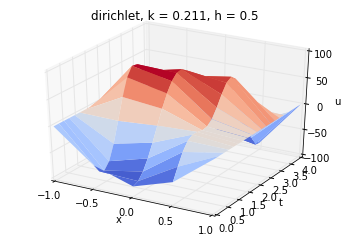

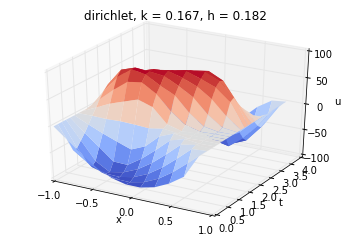

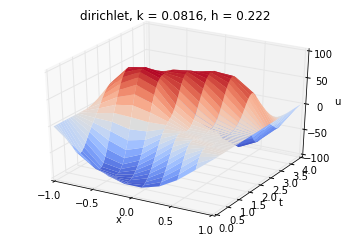

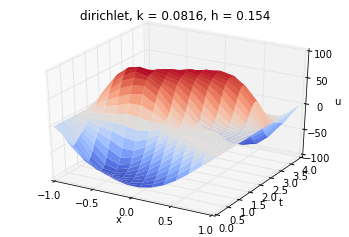

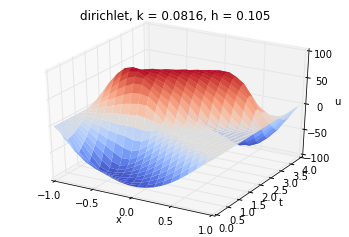

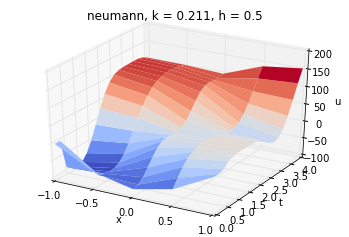

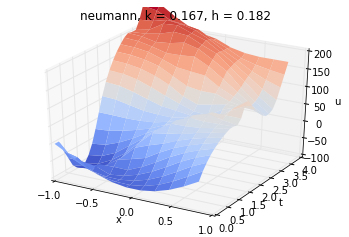

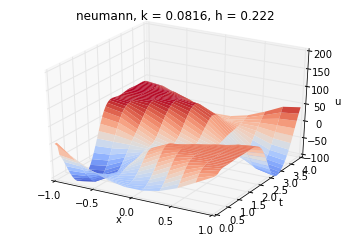

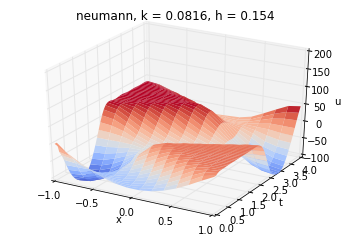

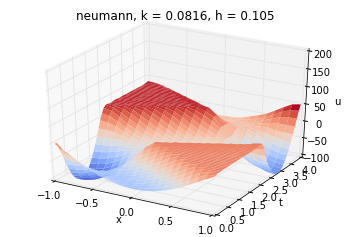

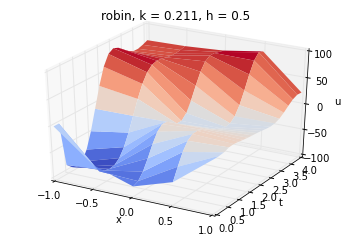

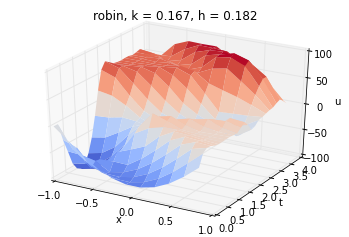

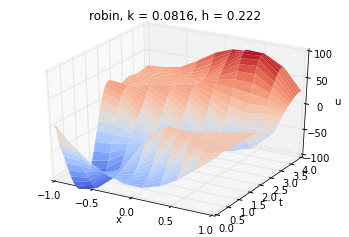

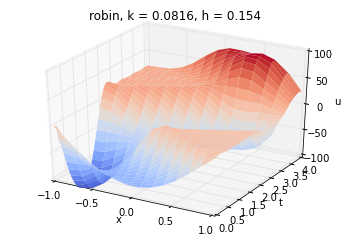

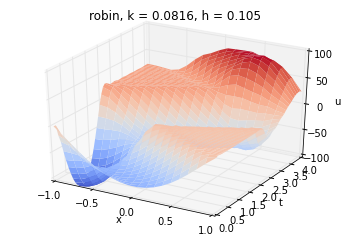

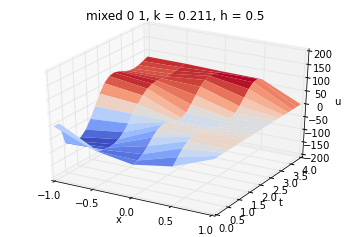

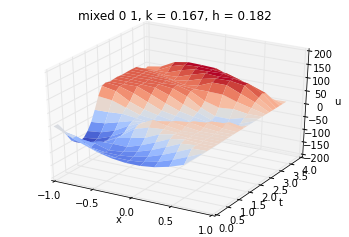

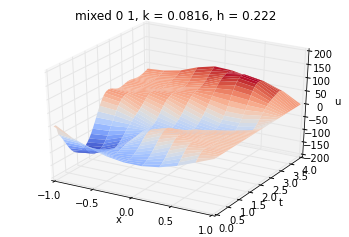

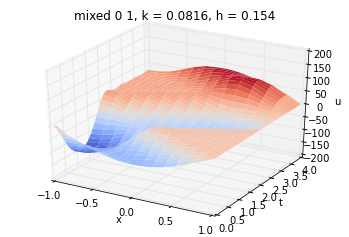

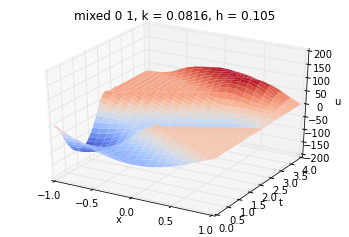

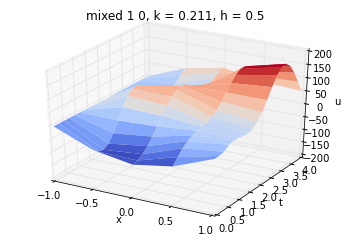

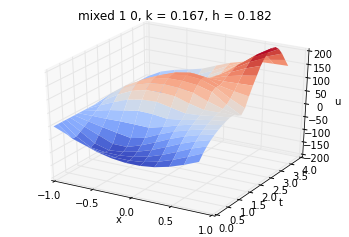

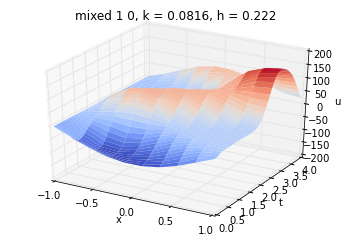

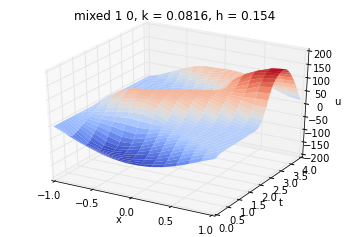

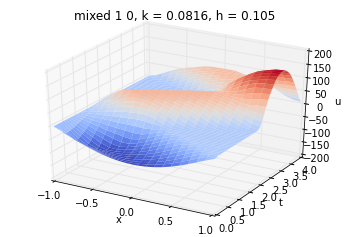

[-22.74957077 -20.39815625   0.          20.39815625  22.74957077]
[-33.28150696 -76.73194519 -79.76098951 -35.9356327   12.21763459]
[  0.         -59.40670256 -84.14709848 -59.40670256   0.        ]
[-33.28150696 -76.73194519 -79.76098951 -35.9356327   12.21763459]
[  0.         -59.40670256 -84.14709848 -59.40670256   0.        ]
[[ 1.64542936  0.17728532  0.          0.17728532  0.        ]
 [ 0.17728532  1.64542936  0.17728532  0.          0.        ]
 [ 0.          0.17728532  1.64542936  0.17728532  0.        ]
 [ 0.          0.          0.17728532  1.64542936  0.17728532]
 [ 0.          0.17728532  0.          0.17728532  1.64542936]]
[ -7.47366762e+01  -1.46297771e+02  -1.51215382e+02  -7.11039904e+01
   1.28947255e-01]
-74.7366762324 0.128947254529
-107.170682695 -29.4837290864
-116.950910788 -63.9881396935
-100.352901635 -90.8933565462
-65.0629571816 -102.460715027
-26.1755438558 -97.1704578096
0.989543766713 -78.4298144225
7.40515353898 -52.2788764529
-6.89134291818 -25.677

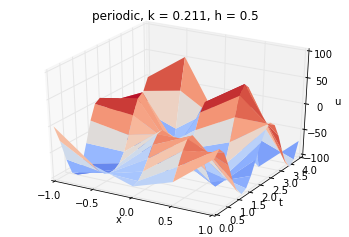

[-18.01007686 -21.38674862 -19.49645681 -14.82926743  -9.06577337
  -3.03019954   3.03019954   9.06577337  14.82926743  19.49645681
  21.38674862]
[-46.09336836 -43.71643199 -62.66089855 -76.02496478 -83.05980469
 -83.57596009 -77.515561   -64.92825795 -46.36642991 -23.66798493
 -10.22542253]
[  0.         -22.09385522 -44.74902042 -63.63262644 -76.71593841
 -83.32066161 -83.32066161 -76.71593841 -63.63262644 -44.74902042
 -22.09385522]
[-46.09336836 -43.71643199 -62.66089855 -76.02496478 -83.05980469
 -83.57596009 -77.515561   -64.92825795 -46.36642991 -23.66798493
 -10.22542253]
[  0.         -22.09385522 -44.74902042 -63.63262644 -76.71593841
 -83.32066161 -83.32066161 -76.71593841 -63.63262644 -44.74902042
 -22.09385522]
[[ 0.31944444  0.84027778  0.          0.          0.          0.          0.
   0.          0.          0.84027778  0.        ]
 [ 0.84027778  0.31944444  0.84027778  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.  

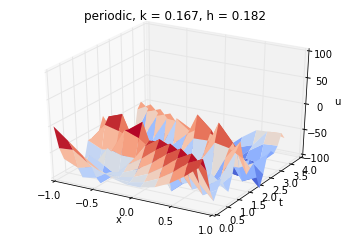

[ -8.82126214 -10.44491689  -8.64169586  -5.40861773  -1.81392071
   1.81392071   5.40861773   8.64169586  10.44491689   8.82126214]
[-12.5019842  -37.66816626 -61.92605994 -77.83088869 -84.06163315
 -80.43379172 -67.01365322 -44.64266822 -16.77833249   5.14054007]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[-12.5019842  -37.66816626 -61.92605994 -77.83088869 -84.06163315
 -80.43379172 -67.01365322 -44.64266822 -16.77833249   5.14054007]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[[ 1.73011245  0.13494377  0.          0.          0.          0.          0.
   0.          0.13494377  0.        ]
 [ 0.13494377  1.73011245  0.13494377  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.13494377  1.73011245  0.13494377  0.          0.          0.
   0.          0.      

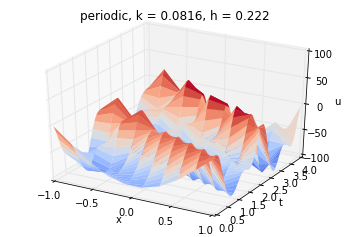

[ -8.82126214 -10.4225816  -10.02939191  -8.42427072  -6.21085365
  -3.76231956  -1.25586498   1.25586498   3.76231956   6.21085365
   8.42427072  10.02939191  10.4225816    8.82126214]
[-14.03320973 -29.07626703 -47.78070161 -63.46449444 -74.99468523
 -81.92698075 -84.14521576 -81.63348579 -74.40234162 -62.57297792
 -46.61595301 -27.7219178   -8.23110384   3.60931454]
[  0.         -18.51166595 -38.03217445 -55.5575461  -69.40809221
 -78.82417153 -83.55538596 -83.55538596 -78.82417153 -69.40809221
 -55.5575461  -38.03217445 -18.51166595   0.        ]
[-14.03320973 -29.07626703 -47.78070161 -63.46449444 -74.99468523
 -81.92698075 -84.14521576 -81.63348579 -74.40234162 -62.57297792
 -46.61595301 -27.7219178   -8.23110384   3.60931454]
[  0.         -18.51166595 -38.03217445 -55.5575461  -69.40809221
 -78.82417153 -83.55538596 -83.55538596 -78.82417153 -69.40809221
 -55.5575461  -38.03217445 -18.51166595   0.        ]
[[ 1.43690129  0.28154935  0.          0.          0.          0.     

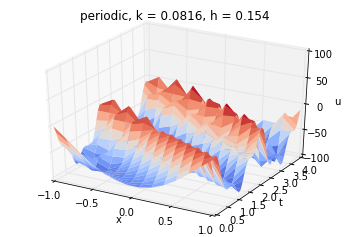

[ -8.82126214 -10.17164853 -10.46584168  -9.96888916  -8.92619727
  -7.53976091  -5.95971287  -4.28615696  -2.57707217  -0.85928779
   0.85928779   2.57707217   4.28615696   5.95971287   7.53976091
   8.92619727   9.96888916  10.46584168  10.17164853   8.82126214]
[-16.26252413 -22.85489825 -36.19594984 -48.6870882  -59.70271834
 -68.85783899 -75.94174859 -80.85646374 -83.56647403 -84.06306686
 -82.34449128 -78.41232969 -72.28414981 -64.02232284 -53.77831718
 -41.8503238  -28.74930988 -15.26426648  -2.51160118   1.38000014]
[  0.         -12.37290169 -25.77786101 -39.02401897 -51.25317741
 -61.89722246 -70.61533172 -77.22742477 -81.65428194 -83.87009052
 -83.87009052 -81.65428194 -77.22742477 -70.61533172 -61.89722246
 -51.25317741 -39.02401897 -25.77786101 -12.37290169   0.        ]
[-16.26252413 -22.85489825 -36.19594984 -48.6870882  -59.70271834
 -68.85783899 -75.94174859 -80.85646374 -83.56647403 -84.06306686
 -82.34449128 -78.41232969 -72.28414981 -64.02232284 -53.77831718
 -41.85

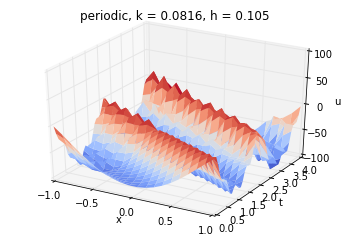

In [39]:
%matplotlib inline
T = 4.0
khs = [(T/nt_1,2.0/nx_1) for nt_1,nx_1 in [(19,4),(24,11),(49,9),(49,13),(49,19)]]
a = 1
b = 1
for k,h in khs:
    W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=a, l=l ,r=r)
    plot_discrete_PDE(xs,ts,W,(-100,100),k,h,a=a,b=b)
a = 0
b = 0
for k,h in khs:
    W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=b, l=l ,r=r)
    plot_discrete_PDE(xs,ts,W,(-100,200),k,h,a=a, b=b)
a = 0.01
b = 0.9
for k,h in khs:
    W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=b, l=l ,r=r)
    plot_discrete_PDE(xs,ts,W,(-100,100),k,h,a=a, b=b)
a = 0
b = 1
for k,h in khs:
    W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=b, l=l ,r=r)
    plot_discrete_PDE(xs,ts,W,(-200,200),k,h,a=a, b=b)
a = 1
b = 0
for k,h in khs:
    W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=b, l=l ,r=r)
    plot_discrete_PDE(xs,ts,W,(-200,200),k,h,a=a, b=b)
    
for k,h in khs:
    W,xs,ts = pde_solver(h,k,T,c,f,g,period=True)
    plot_discrete_PDE(xs,ts,W,(-100,100),k,h,period = True)

4.-

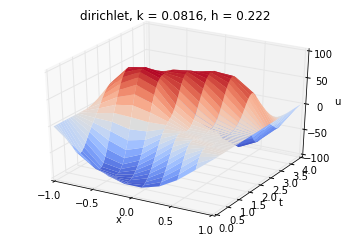

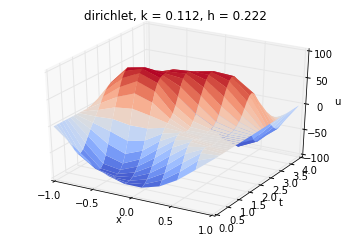

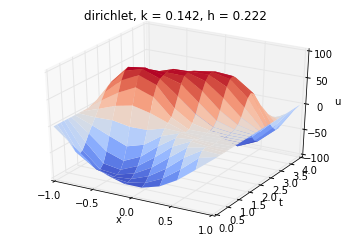

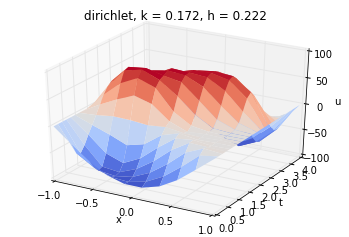

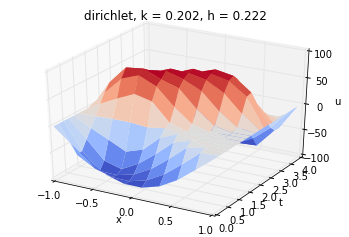

Falla en k =  0.231632653061


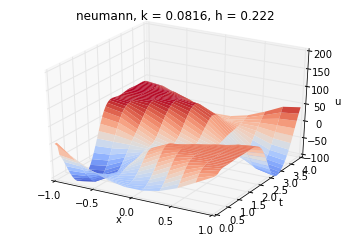

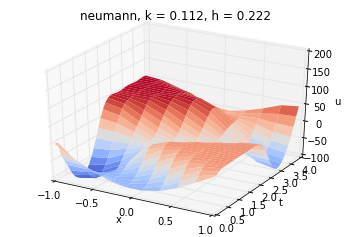

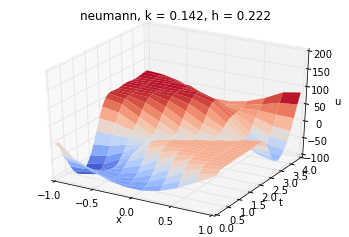

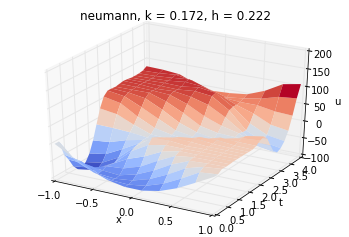

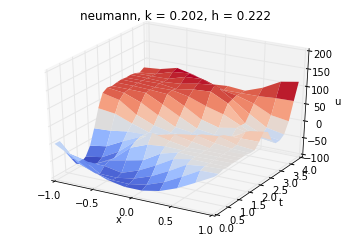

Falla en k =  0.231632653061


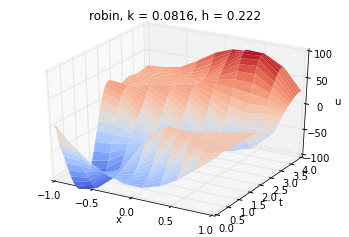

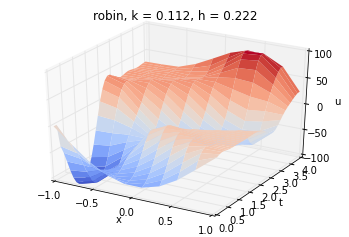

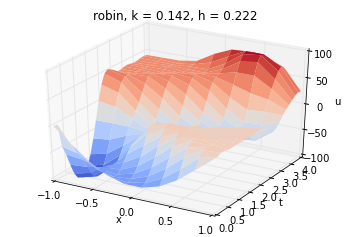

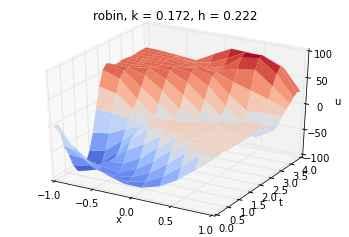

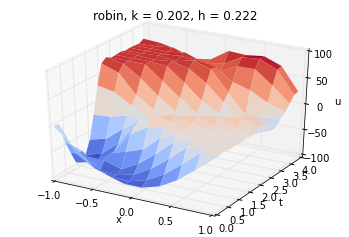

Falla en k =  0.231632653061


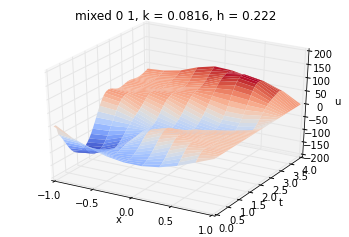

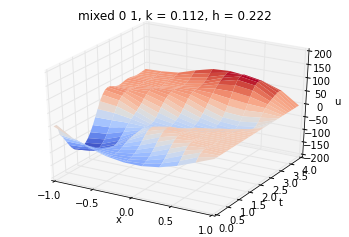

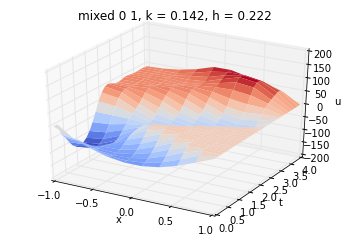

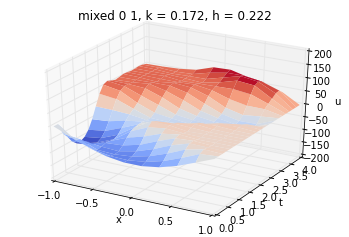

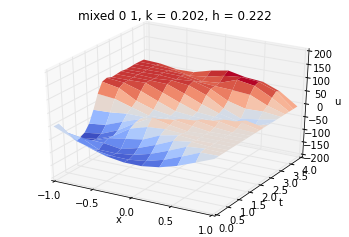

Falla en k =  0.231632653061


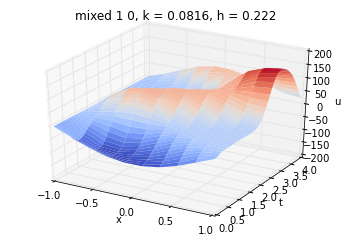

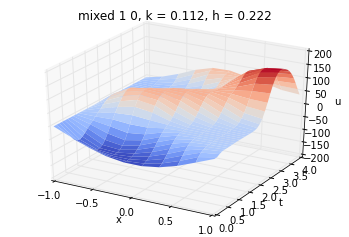

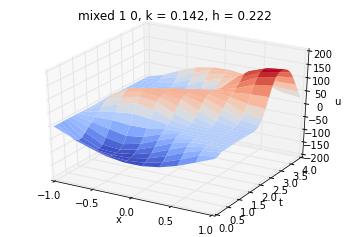

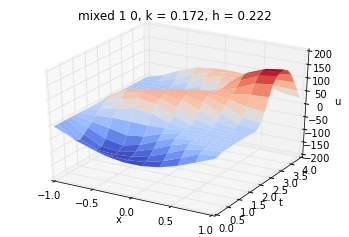

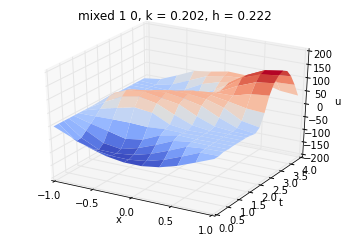

Falla en k =  0.231632653061
[ -8.82126214 -10.44491689  -8.64169586  -5.40861773  -1.81392071
   1.81392071   5.40861773   8.64169586  10.44491689   8.82126214]
[-12.5019842  -37.66816626 -61.92605994 -77.83088869 -84.06163315
 -80.43379172 -67.01365322 -44.64266822 -16.77833249   5.14054007]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[-12.5019842  -37.66816626 -61.92605994 -77.83088869 -84.06163315
 -80.43379172 -67.01365322 -44.64266822 -16.77833249   5.14054007]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[[ 1.73011245  0.13494377  0.          0.          0.          0.          0.
   0.          0.13494377  0.        ]
 [ 0.13494377  1.73011245  0.13494377  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.13494377  1.73011245  0.13494377  0.          0.       

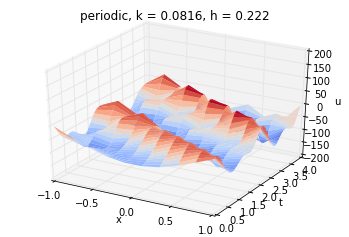

[-12.06307597 -14.28342384 -11.81751909  -7.39628475  -2.48053658
   2.48053658   7.39628475  11.81751909  14.28342384  12.06307597]
[-18.94623327 -41.46080493 -64.67883738 -79.26470864 -84.14979254
 -79.18871939 -64.47213914 -41.0437992  -12.89395725   5.17991867]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[-18.94623327 -41.46080493 -64.67883738 -79.26470864 -84.14979254
 -79.18871939 -64.47213914 -41.0437992  -12.89395725   5.17991867]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[[ 1.49529511  0.25235245  0.          0.          0.          0.          0.
   0.          0.25235245  0.        ]
 [ 0.25235245  1.49529511  0.25235245  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.25235245  1.49529511  0.25235245  0.          0.          0.
   0.          0.      

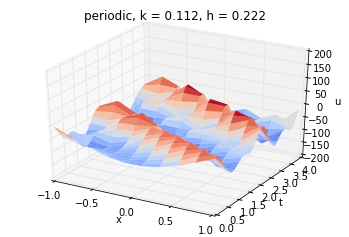

[-15.30488981 -18.1219308  -14.99334232  -9.38395177  -3.14715244
   3.14715244   9.38395177  14.99334232  18.1219308   15.30488981]
[-26.38469138 -45.2392036  -67.30027853 -80.52658451 -84.05836778
 -77.7640629  -61.75868097 -37.31359389  -8.99534201   4.22508823]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[-26.38469138 -45.2392036  -67.30027853 -80.52658451 -84.05836778
 -77.7640629  -61.75868097 -37.31359389  -8.99534201   4.22508823]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[[ 1.18757776  0.40621112  0.          0.          0.          0.          0.
   0.          0.40621112  0.        ]
 [ 0.40621112  1.18757776  0.40621112  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.40621112  1.18757776  0.40621112  0.          0.          0.
   0.          0.      

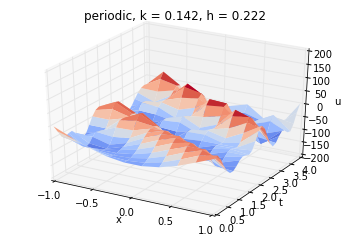

[-18.54670364 -21.96043775 -18.16916555 -11.37161878  -3.8137683
   3.8137683   11.37161878  18.16916555  21.96043775  18.54670364]
[-34.81735853 -49.00336228 -69.7903834  -81.6165163  -83.78735885
 -76.15982225 -58.87327873 -33.4520523   -5.08248677   2.27604875]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[-34.81735853 -49.00336228 -69.7903834  -81.6165163  -83.78735885
 -76.15982225 -58.87327873 -33.4520523   -5.08248677   2.27604875]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[[ 0.80696041  0.59651979  0.          0.          0.          0.          0.
   0.          0.59651979  0.        ]
 [ 0.59651979  0.80696041  0.59651979  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.59651979  0.80696041  0.59651979  0.          0.          0.
   0.          0.       

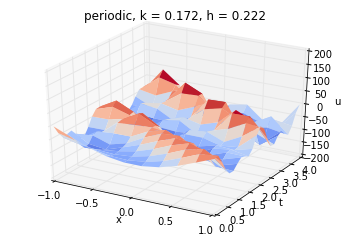

[-21.78851748 -25.79894471 -21.34498878 -13.3592858   -4.48038416
   4.48038416  13.3592858   21.34498878  25.79894471  21.78851748]
[-44.24423472 -52.75328096 -72.14915197 -82.53450403 -83.33676575
 -74.37599743 -55.81593242 -29.45917442  -1.15539154  -0.66719976]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[-44.24423472 -52.75328096 -72.14915197 -82.53450403 -83.33676575
 -74.37599743 -55.81593242 -29.45917442  -1.15539154  -0.66719976]
[  0.         -27.27596814 -53.77059218 -73.05883563 -82.91256194
 -82.91256194 -73.05883563 -53.77059218 -27.27596814   0.        ]
[[ 0.35344307  0.82327847  0.          0.          0.          0.          0.
   0.          0.82327847  0.        ]
 [ 0.82327847  0.35344307  0.82327847  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.82327847  0.35344307  0.82327847  0.          0.          0.
   0.          0.      

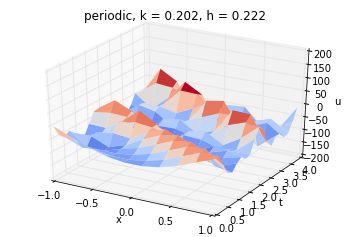

Falla en k =  0.231632653061


In [40]:
T = 4.0
k = T/49
h = 2.0/9
ks = np.arange(k,1,0.03)
a = 1
b = 1
for k in ks:
    try:   
        W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=a, l=l ,r=r)
        plot_discrete_PDE(xs,ts,W,(-100,100),k,h,a=a,b=b)
    except Exception:
        print "Falla en k = ", k
        break
a = 0
b = 0
for k in ks:
    try:
        W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=b, l=l ,r=r)
        plot_discrete_PDE(xs,ts,W,(-100,200),k,h,a=a, b=b)
    except Exception:
        print "Falla en k = ", k
        break
a = 0.01
b = 0.9
for k in ks:
    try:
        W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=b, l=l ,r=r)
        plot_discrete_PDE(xs,ts,W,(-100,100),k,h,a=a, b=b)
    except Exception:
        print "Falla en k = ", k
        break
a = 0
b = 1
for k in ks:
    try:
        W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=b, l=l ,r=r)
        plot_discrete_PDE(xs,ts,W,(-200,200),k,h,a=a, b=b)
    except Exception:
        print "Falla en k = ", k
        break
a = 1
b = 0
for k in ks:
    try:
        W,xs,ts = pde_solver(h,k,T,c,f,g,a=a, b=b, l=l ,r=r)
        plot_discrete_PDE(xs,ts,W,(-200,200),k,h,a=a, b=b)
    except Exception:
        print "Falla en k = ", k
        break

for k in ks:
    try:
        W,xs,ts = pde_solver(h,k,T,c,f,g,period = True)
        plot_discrete_PDE(xs,ts,W,(-200,200),k,h,period =True)
    except Exception:
        print "Falla en k = ", k
        break

A medida que aumenta $k$, la resolución a lo largo del eje temporal disminuye, por lo que la solución se vuelve menos exacta, ya que existe una dependencia con las aproximaciones anteriores para el cálculo de aproximaciones posteriores en el tiempo. Se aprecia una diminución general en el valor absoluto de las soluciones aproximadas a medida que $k$ aumenta 

## Conclusiones



## Referencias

1. https://es.wikipedia.org/wiki/Ley_de_Faraday: Usado en la parte 1 de la primera parte del desarrollo para su resolución.
2. https://es.wikipedia.org/wiki/Permeabilidad_magn%C3%A9tica: Información sobre la permeabilidad magnética del vacío.
3. https://es.wikipedia.org/wiki/Permitividad#Permitividad_del_vac.C3.ADo: Información sobre la permitividad del vacío.
4. https://es.wikipedia.org/wiki/Velocidad_de_la_luz: Información sobre la velocidad de la luz 